## Eindopdracht

#### Naar aanleiding van video: [bron](https://www.youtube.com/watch?v=uqomO_BZ44g)

#### Bedenk een binair classificatie uitdaging. Stel een image datasetsamen met eigen foto’s
Het model moet aangeven of een afbeelding een ei of een bij bevat.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [3]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('data/train/',
                                         target_size = (512,512),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('data/validation/',
                                         target_size = (512,512),
                                         batch_size = 1,
                                         class_mode = 'binary')

Found 21 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [4]:
model = Sequential([ Conv2D(16, (3,3), activation='relu', input_shape=(512,512,3)),
                     MaxPool2D(2,2),
                     #
                     Conv2D(32, (3,3), activation='relu'),
                     MaxPool2D(2,2),
                     #
                     Conv2D(64, (3,3), activation='relu'),
                     MaxPool2D(2,2),
                     ##
                     Flatten(),
                     ##
                     Dense(1, activation='sigmoid')
                   ])

In [5]:
# early stopping callback
es = EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=True, verbose=1)

model.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=0.001),
             metrics = ['accuracy'])

model_fit = model.fit(train_dataset,
                      batch_size=10,
                      steps_per_epoch=2, 
                      epochs=100, 
                      validation_data=validation_dataset,
                      callbacks=[es]
                     )

Epoch 1/100
2/2 [==============================] - 1s 432ms/step - loss: 7.9135 - accuracy: 0.5000 - val_loss: 3.5600 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 274ms/step - loss: 0.6633 - accuracy: 0.6667 - val_loss: 1.2179 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 273ms/step - loss: 1.4499 - accuracy: 0.5000 - val_loss: 1.9651 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 275ms/step - loss: 2.3187 - accuracy: 0.3333 - val_loss: 0.7479 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 272ms/step - loss: 0.7569 - accuracy: 0.6667 - val_loss: 1.1324 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 271ms/step - loss: 1.2530 - accuracy: 0.5000 - val_loss: 0.9252 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 274ms/step - loss: 0.9410 - accuracy: 0.3333 - val_loss: 0.6330 - val_accuracy: 0.5000
Epoch 8/100
2

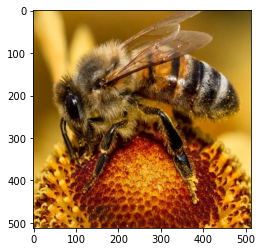

bij


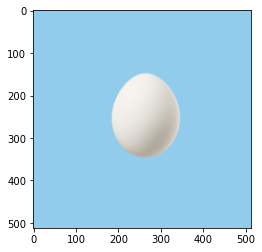

ei


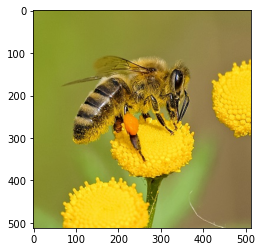

bij


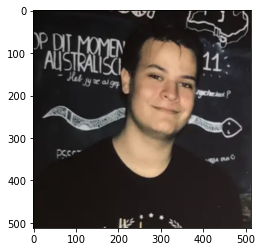

ei


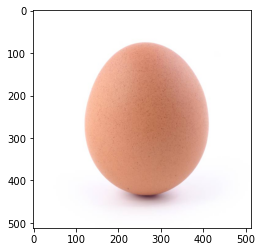

ei


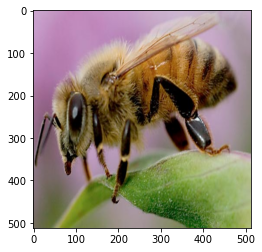

bij


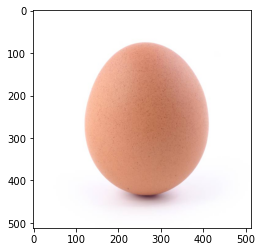

ei


In [6]:
dir_path = 'data/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i)
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    #print(val)
    if val < 0.5:
        print('ei')
    if val > 0.5:
        print('bij')
    
#validation_dataset.class_indices
#'negative: 0', 'positive: 1' 
# 0 = ei, 1 = bij

#### Test het CNN.Wat is je conclusie?

Doordat het model is getraind met de juiste waarden en een representatieve validationset preseert het model goed. 
Door de callback op de loss van het model wordt er gezorgd dat het model niet kan overfitten. Er is te zien dat dit ook niet gebeurd in het model. De accuracy van zowel de training als de validation dataset zijn hoog. De validation loss is nog vrij hoog, maar dit komt omdat de callback enkel kijkt naar de loss van de trainingsset.


Dit is verder niet te zien wanneer de testset aan het model wordt getoetst. Hier is te zien dat het model ook afbeeldingen die niet in de training of validation dataset zaten correct worden herkent.

Dit is ook de reden dat er verder niet meer gekeken is naar andere parameters waarmee de validation loss mogelijk nog lager kan worden.